In [4]:
import numpy as np  # es útil para muchos cálculos científicos en Python 
import pandas as pd # biblioteca primaria de estructura de datos

In [5]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [25]:
import numpy as np # librería para manejar datos vectorizados

import pandas as pd # librería para análisis de datos
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # librería para manejar archivos JSON 

!conda install -c conda-forge geopy --yes # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare 
from geopy.geocoders import Nominatim # convertir una dirección en valores de latitud y longitud

import requests # librería para manejar solicitudes
from pandas.io.json import json_normalize # librería para convertir un archivo json en un dataframe pandas

# Matplotlib y módulos asociados para graficar
import matplotlib.cm as cm
import matplotlib.colors as colors

# importar k-means desde la fase de agrupación
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare
import folium # librería para graficar mapas 

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare


Libraries imported.


In [6]:
df_dc = pd.read_csv('https://cocl.us/datascience_survey_data', index_col=0)

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [7]:
df_dc.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [8]:
#df_dc['Total']= df_dc.sum(axis=1)
#df_dc= df_dc.sum(axis=0)
df_dc.sort_values(['Very interested','Somewhat interested','Not interested'],ascending=False, inplace=True)
df_dc

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [9]:
#df_dc2=pd.DataFrame()
#df_dc2['Very interested']=round(df_dc['Very interested']*100/2233,2)
#df_dc2['Somewhat interested']=round(df_dc['Somewhat interested']*100/2233,2)
#df_dc2['Not interested']=round(df_dc['Not interested']*100/2233,2)
#df_dc2['Total']= df_dc2.sum(axis=1)

In [10]:
#df_dc2

In [11]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # opcional: para estilo tipo ggplot

# revisar la última versión de Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


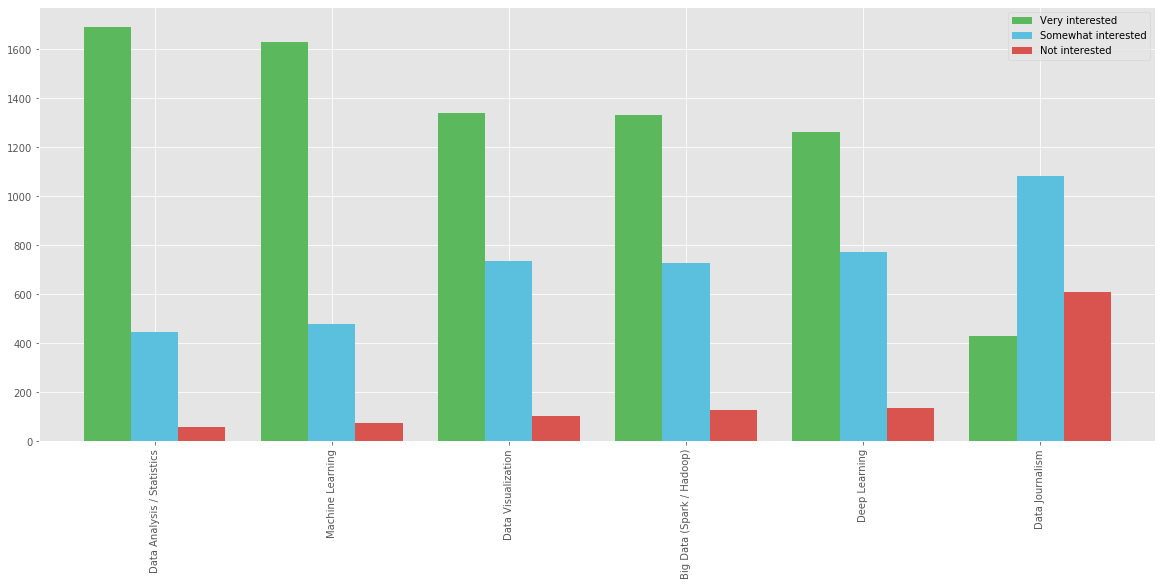

In [12]:
df_dc.plot(kind='bar', color=['#5cb85c', '#5bc0de',"#d9534f"], figsize=(20, 8), width=0.8)

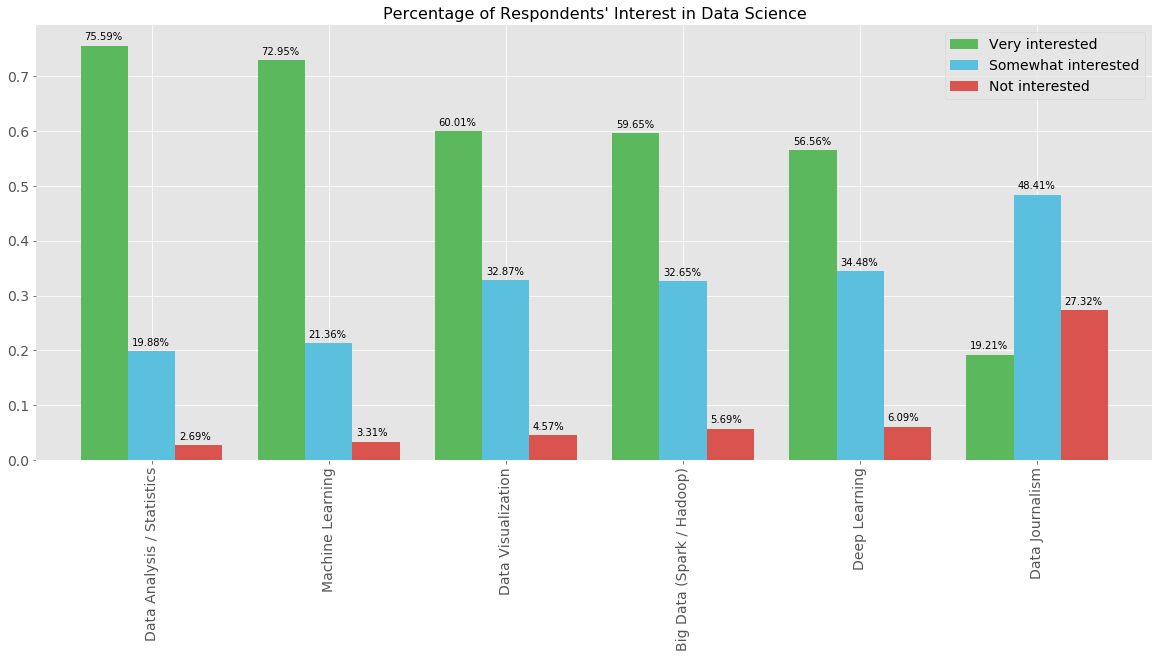

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Formatting to a percentage will be done in the plotting
df_dcp = df_dc / 2233

#PLOTTING
ax1 = df_dcp.plot(kind = 'bar',
                figsize = (20,8),
                width = 0.8,
                color = ('#5cb85c', '#5bc0de', '#d9534f'),
                fontsize = 14)
ax1.set_title("Percentage of Respondents' Interest in Data Science", 
             fontsize = 16)
ax1.legend(fontsize = 14)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Adding the percentage values    
for p in ax1.patches:
    ax1.annotate("{:.2%}".format(p.get_height()),
                xy=(p.get_x()+0.02, p.get_height()+0.01))

In [32]:
df_incidents = pd.read_csv('https://cocl.us/sanfran_crime_dataset')

print('Dataset downloaded and read into a pandas dataframe!')

KeyboardInterrupt: 

In [15]:
df_incidents

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374


In [16]:
#df_incidents['Count']=df_incidents.groupby('PdDistrict').count('IncidntNum')
df_incidents.rename(columns={'PdDistrict':'Neighborhood', 'IncidntNum':'Count'}, inplace=True)
df_incidents.columns 

Index(['Count', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'Neighborhood', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [17]:
df_incidents.drop(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
        'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'], axis=1, inplace=True)
df_incidents

,Count,Neighborhood
0,120058272,SOUTHERN
1,120058272,SOUTHERN
2,141059263,BAYVIEW
3,160013662,TENDERLOIN
4,160002740,MISSION
...,...,...
150495,161061000,PARK
150496,176000742,CENTRAL
150497,176000758,CENTRAL
150498,176000764,CENTRAL


In [18]:
#df_incidents['Count']=
df_sf=df_incidents.groupby('Neighborhood', as_index=False).count()
#df_sf.rename(columns={'IncidntNum':'Count'}, inplace=True)

In [19]:
#df_sf.drop(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
        #'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'], axis=1, inplace=True)
#df_sf.sort_values('Count', inplace=True)
df_sf.sort_index()

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [20]:
# descargue el archivo de geojson de los países
!wget --quiet  https://cocl.us/sanfran_geojson
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [26]:
address = 'Toronto, TOR'
#address = 'Montevideo, UY'
#address = 'New York City, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.7370584, -79.2442535.


In [28]:
toronto_geo = r'Neighbourhoods.geojson' # archivo geojson
toronto_geo

'Neighbourhoods.geojson'

In [21]:
sanfran_geo = r'sanfran_geojson' # archivo geojson

In [30]:
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=12)
#toronto_map

In [33]:
#threshold_scale = np.linspace(df_sf['Count'].min(),
#                              df_sf['Count'].max(),
#                              6, dtype=int)
threshold_scale = np.linspace(0,
                              100,
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # cambie la matriz de NumPy a una lista
threshold_scale[-1] = threshold_scale[-1] + 1 # asegúrese de que el último valor de la lista sea mayor que la inmigración máxima

# permita que Folium determine la escala.
toronto_map.choropleth(
    geo_data=toronto_geo,
    #data=df_sf,
    #columns=['Neighborhood', 'Count'],
    #key_on='feature.properties.DISTRICT',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Barrios de Toronto',
    reset=True
    )
toronto_map